In [ ]:
import pandas as pd
import seaborn as sns
import wordcloud as wd

In [ ]:
df = pd.read_csv(filepath_or_buffer='train.csv', engine='python', error_bad_lines=False)

<ipython-input-2-a83c81aa1df6>:1: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv(filepath_or_buffer='train.csv', engine='python', error_bad_lines=False)
Skipping line 2931: unexpected end of data


In [ ]:
print(df.head(2))

   PRODUCT_ID                                              TITLE  \
0     1925202  ArtzFolio Tulip Flowers Blackout Curtain for D...   
1     2673191  Marks & Spencer Girls' Pyjama Sets T86_2561C_N...   

                                       BULLET_POINTS DESCRIPTION  \
0  [LUXURIOUS & APPEALING: Beautiful custom-made ...         NaN   
1  [Harry Potter Hedwig Pyjamas (6-16 Yrs),100% c...         NaN   

   PRODUCT_TYPE_ID  PRODUCT_LENGTH  
0             1650         2125.98  
1             2755          393.70  


In [ ]:
# Print the number of missing values in each column
print(df.isnull().sum())

PRODUCT_ID            0
TITLE                 0
BULLET_POINTS      1099
DESCRIPTION        1525
PRODUCT_TYPE_ID       0
PRODUCT_LENGTH        0
dtype: int64


In [ ]:
# Impute missing values in the TITLE column with the mode
df['TITLE'].fillna(df['TITLE'].mode()[0], inplace=True)

In [ ]:
# Drop rows with missing values in the BULLET_POINTS and DESCRIPTION columns
df.dropna(subset=['BULLET_POINTS', 'DESCRIPTION'], inplace=True)

In [ ]:
# Verifying missing values
print(df.isnull().sum())

PRODUCT_ID         0
TITLE              0
BULLET_POINTS      0
DESCRIPTION        0
PRODUCT_TYPE_ID    0
PRODUCT_LENGTH     0
dtype: int64


In [ ]:
# Visualizing the df
import matplotlib.pyplot as plt

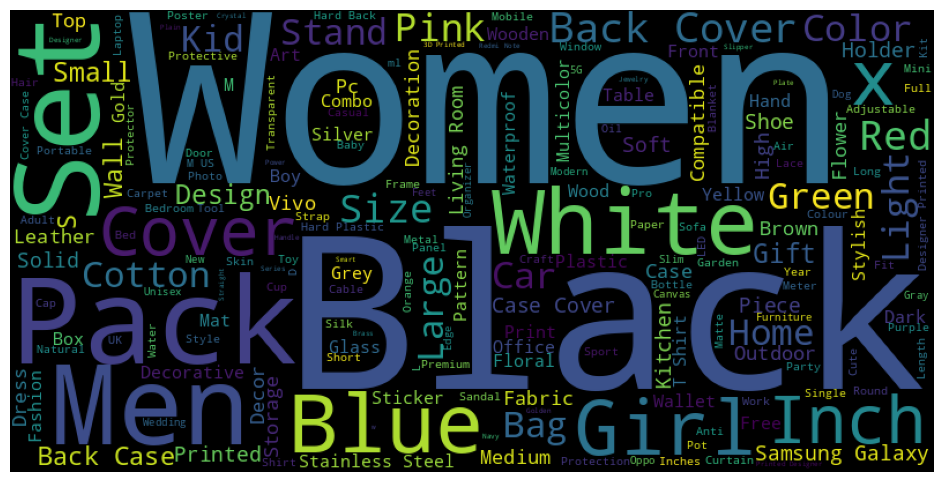

In [ ]:
from wordcloud import WordCloud

# Create a word cloud of the TITLE column
title_text = ' '.join(df['TITLE'].dropna().values)
wordcloud = WordCloud(width=800, height=400).generate(title_text)
plt.figure(figsize=(12, 6))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

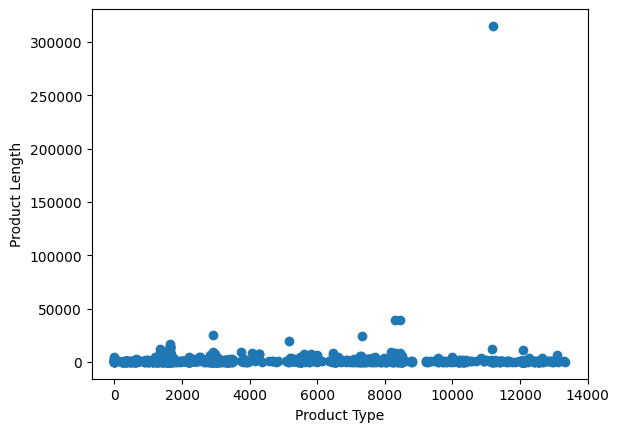

In [ ]:
# Create a scatter plot of the PRODUCT_LENGTH column vs. PRODUCT_TYPE_ID
plt.scatter(df['PRODUCT_TYPE_ID'], df['PRODUCT_LENGTH'])
plt.xlabel('Product Type')
plt.ylabel('Product Length')
plt.show()


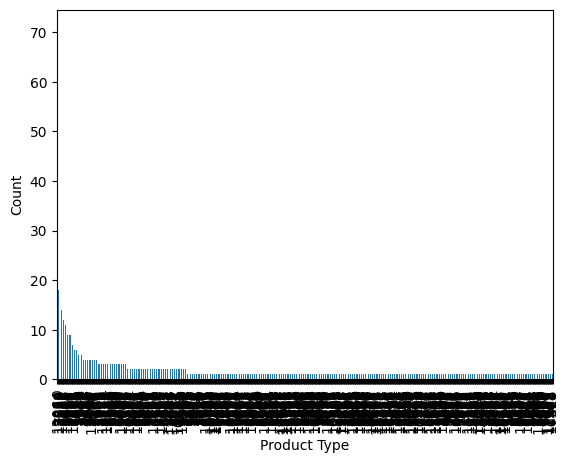

In [ ]:
# Create a bar chart of the PRODUCT_TYPE_ID column
df['PRODUCT_TYPE_ID'].value_counts().plot(kind='bar')
plt.xlabel('Product Type')
plt.ylabel('Count')
plt.show()

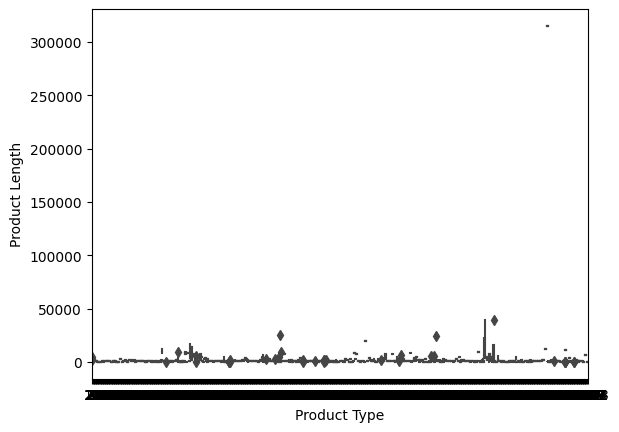

In [ ]:
# Create a box plot of the PRODUCT_LENGTH column by PRODUCT_TYPE_ID
sns.boxplot(x='PRODUCT_TYPE_ID', y='PRODUCT_LENGTH', data=df)
plt.xlabel('Product Type')
plt.ylabel('Product Length')
plt.show()


<ipython-input-13-b99e2f810414>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


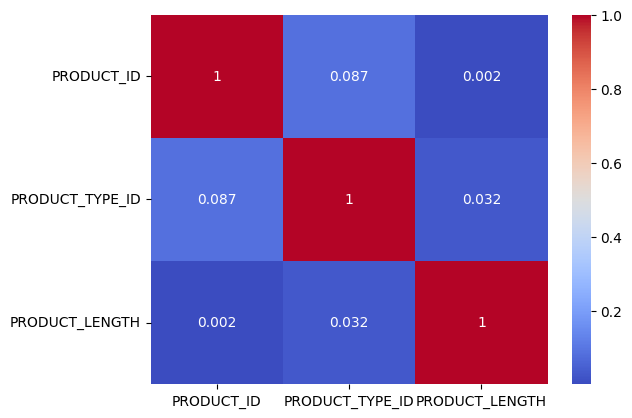

In [ ]:
# Create a correlation matrix between all columns in the dataset
corr = df.corr()
# Create a heatmap of the correlation matrix
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.show()


In [1]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import string

# download nltk resources if necessary
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

# define text preprocessing functions
def tokenize_text(text):
    """
    Tokenizes text into words using NLTK's word_tokenize function.
    """
    tokens = word_tokenize(text)
    return tokens

def remove_stopwords(tokens):
    """
    Removes stop words (common words that don't add much meaning to the text)
    from the tokenized text using NLTK's English stop words list.
    """
    stop_words = set(stopwords.words('english'))
    filtered_tokens = [token for token in tokens if token.lower() not in stop_words]
    return filtered_tokens

def lemmatize_tokens(tokens):
    """
    Lemmatizes tokens (reduces words to their base form) using NLTK's WordNetLemmatizer.
    """
    lemmatizer = WordNetLemmatizer()
    lemmatized_tokens = [lemmatizer.lemmatize(token) for token in tokens]
    return lemmatized_tokens

def preprocess_text(text):
    """
    Applies all text preprocessing steps (tokenization, stopword removal, and lemmatization)
    to a given text.
    """
    tokens = tokenize_text(text)
    filtered_tokens = remove_stopwords(tokens)
    lemmatized_tokens = lemmatize_tokens(filtered_tokens)
    return lemmatized_tokens

# example usage
text = "This is an example sentence for text preprocessing."
tokens = tokenize_text(text)
filtered_tokens = remove_stopwords(tokens)
lemmatized_tokens = lemmatize_tokens(filtered_tokens)
print(lemmatized_tokens)


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


['example', 'sentence', 'text', 'preprocessing', '.']


In [ ]:
# apply text preprocessing to the bullet points and description columns
df['BULLET_POINTS'] = df['BULLET_POINTS'].fillna('').apply(preprocess_text)
df['DESCRIPTION'] = df['DESCRIPTION'].fillna('').apply(preprocess_text)


In [ ]:
print()